In [1]:
#CONVENTIONAL WAY TO IMPORT PANDAS
import pandas as pd

** QUES:- HOW DO I READ TABULAR DATA FILE INTO PANDAS?**

In [2]:
#read_table ASSUMES THAT OUR FILE IS TAB SEPRATED
#ASSUMES THAT FIRST ROW IS A HEADER ROW
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


* **'http://bit.ly/chiporder'** The data in the following link is already tab seprated and has first row as header therefore **read_table()** method can read it directly and it is an easy case.

* **'http://bit.ly/movieusers'** The data in the following link does not follow the default conditions of 
**read_table** such as **first row should be header** and **data should be tab seprated**. The data in the following link is "**|**" seprated. So we will pass the **sep** and **header** argument in the **read_table** telling pandas about the changes.

* Since our data does not contain it's own **header** and **it's name** so we have to tell **pandas** the **header name** otherwise it will show **default integers**. We have to pass the list with coloumn names in the **names** argument of the **read_table()** function.

In [4]:
users_col =['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep = "|", header = None, names = users_col) 

* In case someone has inserted some text in the data file maybe at the top or bottom or anywhere which is not data just some information text we can tell pandas to ignore those rows using **skiprows** and **skipfooter** argument in **read_table()**.


**QUES:- HOW DO I SELECT A PANDAS SERIES FROM A DATA FRAME?**
* A column in a data frame is called a pandas series it can be a part of dataframe or not.

* **read_csv()** used **comma (',')** as default seperator.

In [5]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [6]:
type(ufo)

pandas.core.frame.DataFrame

To select the panada series we have two ways :- **City is one of it's coloumn name in header's row.**
* Using bracket notations. (**ufo['City']**)
* Using dot operator. **(ufo.City)**

Note :- 
* In case of using dot operator **City pandas series** will be added to **ufo** attribute.
* In case series name has a space in it we have to use bracket notation only we can not use dot operators. For ex: ** Colors Reported ** is a series name.
* In case series name conflicts with some built in method name then also we can not use dot operators. for ex:
** shape**, ** head **.

In [7]:
# ufo['City']

In [8]:
# ufo.City

To add a new series into dataframe

In [9]:
ufo['Location'] = ufo.City + ", "+ ufo.State

In [10]:
# ufo

**QUES:- WHY DO SOME PANDAS COMMANDS END WITH PARANTHESIS AND OTHERS DONT**

In [11]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [12]:
# movies.head()

In [13]:
# movies.describe()

In [14]:
movies.shape

(979, 6)

In [15]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [16]:
movies.describe(include = [object])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,True Grit,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


**QUES:- HOW DO I RENAME COLUMNS IN PANDAS DATAFRAME?**

In [17]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [18]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

**Method 1**

In [19]:
ufo.rename(columns = {'Colors Reported': 'Colors_Reported', 'Shape Reported': 'Shape_Reported'}, inplace=True)

In [20]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

**Method 2**
* It is useful in case we want to change the name of all the columns in that case we will make a list of column names in the ordered way and assign it to **ufo.columns = our_list**.

In [21]:
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']

In [22]:
ufo.columns = ufo_cols

In [23]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

**Method 3**
* We can also rename the column while we are reading the file

In [24]:
ufo = pd.read_csv('http://bit.ly/uforeports', names = ufo_cols, header = 0)

In [25]:
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


**NOTE**
* In case you wanna change all the columns in the dataframe with common changes. for ex:- Replacing space with underscore.

In [26]:
ufo.columns = ufo.columns.str.replace(' ','_')

In [27]:
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

** QUES:- HOW DO I REMOVE COLUMNS FROM PANDAS DATAFRAME?**

In [28]:
ufo = pd.read_csv('http://bit.ly/uforeports')

* To remove the column we use **drop("column_name", axis = "0 or 1")** method of dataframe.
* Here **axis = 0** is a **row axis** and **axis = 1** is a **column axis**.
* By default **axis** is **0**.

In [29]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [30]:
ufo.drop('Colors Reported', axis = 1, inplace = True)

In [31]:
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


* In case we want to remove more than one column.

In [32]:
ufo.drop(['City', 'State'], axis = 1, inplace = True)

In [33]:
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


* In case you want to remove rows instead of columns.

In [34]:
ufo.drop([0, 1], axis = 0, inplace = True)

In [35]:
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


**QUES:- HOW DO I SORT A PANDAS DATAFRAME OR A SERIES**

In [36]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [37]:
# movies.head()

In [38]:
# movies['title'].sort_values()

In [39]:
movies['title'].sort_values(ascending = False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [40]:
# movies.sort_values('title')

In [41]:
# movies.sort_values(['genre', 'duration'], ascending = False)

**Note**
when you sort by multiple columns it is sorted in ascending order in each column by default. You can control the order for each column by passing a list against the 'ascending' argument like this: movies.sort_values(['content_rating', 'duration'], ascending= [True, False]) - this way within the "APPROVED" eg, we would get the longest duration movies first.

**HOW DO I FILTER ROWS OF A PANDAS DATAFRAME BY COLUMN VALUE?**

**Step**
* Create a list of booleans which will contain either **True** or **False** for each row of dataframe which will decide whether to show the row in the filtered dataframe.
* Convert our list of booleans into pandas series using **pd.Series(our_list)**.
* Now pass it to the movies dataframe using bracket notation.

In [42]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [43]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
booleans = []

for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)
        

In [45]:
is_long = pd.Series(booleans)

In [46]:
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

* We do not need to write the for-loop ourselves we can do both the above steps in a single line.

In [47]:
is_long = movies.duration >= 200

In [48]:
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [49]:
# movies[is_long]

In [50]:
# movies[is_long]['genre']

* We will now see **loc** method which is considered a better way to filter the dataframe nowadays.
* The first argument in **loc** represents the boolean list for filter and the second argument represent the columns we want.

In [51]:
movies.loc[is_long, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

** HOW DO I APPLY MULTIPLE FILTER CRITERIA TO A PANDAS DATAFRAME?**
* We will use **and(&)**, **or(|)** operator for multiple filter.

In [52]:
movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [53]:
# movies[(movies.duration >= 200) | (movies.genre == 'Drama')]

In case we want to select more than one conditions on a column for filter. for ex:- We want to select only those rows which are either of genre **Drama**, **Crime**, **Action**. 

* Normally we would do this which will include lot of typing.

In [54]:
# movies[(movies.genre == 'Drama') | (movies.genre == 'Crime') | (movies.genre == 'Action') ]

* Another way to do the same thing is using the **isin** operator.

In [55]:
# movies[movies.genre.isin(['Crime', 'Drama', 'Action'])]

**SOME PANDAS QUESTIONS ANSWERED**

* **Ques:- What about reading only two columns from csv file and ignoring others?**

In [56]:
ufo = pd.read_csv('http://bit.ly/uforeports', usecols = ['City', 'State'])

In [57]:
ufo.head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


* We can also use the index number instead of column name.

In [58]:
ufo = pd.read_csv('http://bit.ly/uforeports', usecols = [0, 3])

In [59]:
ufo.head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


* **Ques:- How to pull of only some rows from a dataset?**

 Note
* This maybe usefull in case dataset is too big and we want to just see the first few rows of it.

In [60]:
ufo = pd.read_csv('http://bit.ly/uforeports', nrows = 3)

In [61]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


** Ques:- How do dataframes and series work with regard to selecting individual entries and iteration (for x in userdata)? **

* Panda series is iterable just like python list.

In [62]:
for city in ufo.City:
    print(city)

Ithaca
Willingboro
Holyoke


* For iterating the dataframe we will use method iterrows().

In [63]:
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO


**Ques:- What's the best way to drop every non numeric column from a DataFrame?**

In [64]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [65]:
# drinks

In [66]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [67]:
import numpy as np

In [68]:
# drinks.select_dtypes(include=[np.number])

**Ques:- When to use  [ ] or ()?**

**ANS:-** Select **shift+tab** inside the bracket of a method to see the arguments and see which type they take list or string or tuple

* Describe method describe all the numeric column?

* To include all the columns?

In [69]:
# drinks.describe(include = 'all')

In [70]:
# drinks.describe(include = ['object', 'float64'])

In [71]:
# drinks.describe(include = ['object'])

**HOW DO I USE AXIS PARAMETERS IN PANDAS?**

* **Mean** method is use to find the mean of a row or column.

In [72]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [73]:
drinks.mean(axis = 0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [74]:
drinks.mean(axis = 1).drop(0,axis = 0)

1       69.975
2        9.925
3      176.850
4       81.225
5       69.975
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 192, dtype: float64

In [75]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [76]:
drinks.drop('continent', axis = 1)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [77]:
drinks.drop(2, axis = 0)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


**Note**
* We can also use **axis = 'index'** instead **axis = 0 ** and **axis = 'columns'** instead **axis = 1 ****

In [78]:
drinks.mean(axis = 'index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [79]:
drinks.mean(axis = 'columns')

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

**HOW DO I USE STRING METHODS IN PANDAS?**

In [80]:
orders = pd.read_table('http://bit.ly/chiporders')

In [81]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


* In Python we will use **upper()** method.

In [82]:
'hello'.upper()

'HELLO'

* In **pandas** we have to just call **.str** method in the chain before other string methods.

In [83]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

* **contains** method is used to check for the certain substring.

In [84]:
orders.item_name.str.contains('Chicken')
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


* To remove the brackets from the **choice_description** we will use replace method two times in a chain.

In [85]:
orders.choice_description.str.replace('[', '').str.replace(']','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

**Note**
* We can also use regular expressions in the **replace** methods.

In [86]:
orders.choice_description.str.replace('[\[\]]','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

**QUES:- HOW DO I CHANGE THE DATATYPE OF A PANDAS SERIES?**
* We will use **astype()** method to change the datatype of a pandas series.
* This will be usefull in case of converting string to int or float to do the mathmatics mostly when our data is store in file in the form of string.

In [87]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [88]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [89]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [90]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

**QUES:- HOW TO DEFINE TYPE OF EACH COLUMN BEFORE ACTUALLY READING THE CSV?**

In [91]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype = {'beer_servings':float})

In [92]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [93]:
orders = pd.read_table('http://bit.ly/chiporders')

In [94]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [95]:
orders.item_price.str.replace("$","").astype(float).mean()

7.464335785374397

In [96]:
orders.item_name.str.contains("Chicken")

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [97]:
orders.item_name.str.contains("Chicken").astype(int)

0       0
1       0
2       0
3       0
4       1
       ..
4617    0
4618    0
4619    1
4620    1
4621    1
Name: item_name, Length: 4622, dtype: int64

**QUES:- WHEN SHOULD I USE A "groupby" IN PANDAS?**
* In general we should use it when we want to analyse pandas series by some category.

In [98]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [99]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [100]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [101]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [102]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

* **agg()** allows us to specify multiple aggregations function at once

In [103]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [104]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [105]:
%matplotlib inline

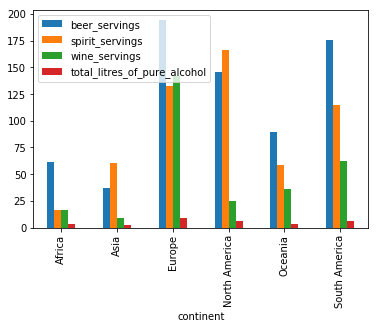

In [106]:
drinks.groupby('continent').mean().plot(kind="bar")

***QUES:- HOW DO I EXPLORE PANDAS SERIES?**

In [107]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [108]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [109]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [110]:
movies.genre.describe()


count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

* **value_counts()** methods tells us about the count of each type of value in a series or their frequency of appearence.

In [111]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

* **normalize = True** arguments will convert these normal values to percentage.


In [112]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

* **unique()** tells us about the unique value in a series.

In [113]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

* **nunique()** tells us about the number of unique values in a series.

In [114]:
movies.genre.nunique()

16

In [115]:
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [117]:
movies.duration.mean()

120.97957099080695

In [118]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

In [119]:
% matplotlib inline

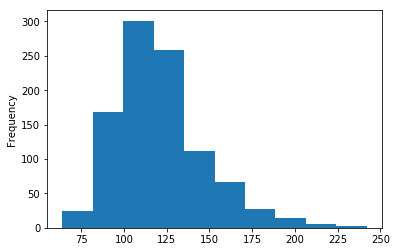

In [120]:
movies.duration.plot(kind="hist")

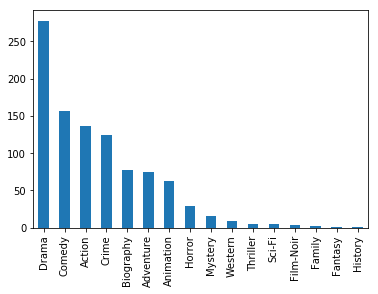

In [121]:
movies.genre.value_counts().plot(kind="bar")

**QUES:- HOW DO I HANDLE MISSING VALUES IN PANDAS?**

In [122]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [123]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [124]:
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [125]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [126]:
ufo.isnull().sum(axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
18236    1
18237    1
18238    2
18239    0
18240    1
Length: 18241, dtype: int64

In [127]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [128]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


* Drop the rows in which any of the five columns has missing values.

In [129]:
ufo.dropna(how="any").shape

(2486, 5)

* Drop the rows in which all the columns is empty.

In [130]:
ufo.dropna(how="all").shape

(18241, 5)

* Drop the rows if any of the columns in subset is missing.

In [131]:
ufo.dropna(subset = ['City', 'Colors Reported' ], how="any").shape

(2877, 5)

* Drop the rows if all the columns in subset has missing values.

In [132]:
ufo.dropna(subset = ['City', 'Colors Reported' ], how="all").shape

(18221, 5)

* To fill the empty places in a dataset we will use **fillna()** methods.

In [133]:
ufo['Shape Reported'].value_counts(dropna = False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
FLARE           1
PYRAMID         1
DOME            1
Name: Shape Reported, dtype: int64

In [134]:
ufo['Shape Reported'].fillna(value = 'VARIOUS', inplace = True)

**QUES:- WHAR ARE THE ADVANTAGES OF USING INDICES INSTEAD OF JUST STORING IT'S VALUE IN THE COLUMNS?**
* **Indexes** are used for **identification**, **Selection**, **Alignment**.

In [135]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [136]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [137]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [138]:
drinks.loc[1, 'beer_servings']

89

In [139]:
drinks.set_index('country', inplace = True)

In [140]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [141]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [142]:
drinks.loc['Brazil', 'beer_servings']

245

In [143]:
drinks.index.name = None

In [144]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [145]:
drinks.index.name = "country"

In [146]:
drinks.reset_index(inplace = True)

In [147]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [148]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [149]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [150]:
drinks.describe().columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [151]:
drinks.describe().loc['25%', 'beer_servings']

20.0

In [152]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [153]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [154]:
drinks.set_index('country', inplace = True)

In [155]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [156]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [157]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [158]:
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [159]:
drinks.continent.value_counts()['Asia']

44

* To sort the pandas series we will use **sort_values()** methods.

In [160]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

* To sort the pandas series by it's index values we will use **sort_index()** method.

In [161]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [162]:
drinks.continent.value_counts().sort_index(ascending = False)

South America    12
Oceania          16
North America    23
Europe           45
Asia             44
Africa           53
Name: continent, dtype: int64

* Showing the **alignment** point for indexes importance.

* Creating a new pandas series from scratch.

In [163]:
people = pd.Series([3000000, 85000], index = ['Albania', 'Andorra'], name = 'population')

In [164]:
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

* As you can see how the value of **Albania** and  **Andorra** got multiple automatically by finding the right index in the **people** series and alligned it in automatically in the output series shown below.
* This was all possible due to the presence of **indexes** which help each row to identify uniquely.

In [165]:
drinks.beer_servings * people

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
                  ...     
Venezuela              NaN
Vietnam                NaN
Yemen                  NaN
Zambia                 NaN
Zimbabwe               NaN
Length: 193, dtype: float64

* **concat()** short form for **concatenation**.
* It is used to concatenate rows over other rows or columns next to other columns.

In [166]:
pd.concat([drinks, people], axis = 1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


**QUES:-  HOW DO I SELECT MULTIPLE ROWS AND COLUMNS FROM A PANDAS DATAFRAME?**

In [167]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [168]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


* **loc** method is for filtering rows and selecting columns by label or columns name.

**Note:-**
**loc** is inclusive on both sides.

In [169]:
ufo.loc[0,:]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [170]:
ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [171]:
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


* Not a recomended way.

In [172]:
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [173]:
ufo.loc[:,['City','State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


Select all rows and column between **City** and **State** inclusively.

In [174]:
ufo.loc[:,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [175]:
ufo.loc[0:2,'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [176]:
ufo[ufo.index <= 2][['City','State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [177]:
ufo.head(3).drop('Time', axis = 1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


* using **loc** with boolean conditions

In [178]:
ufo.loc[ufo.City == 'Oakland','State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

## iloc
* It is for selecting rows and columns by **integer** positions.
* **iloc** is **exclusive** of the second number and **inclusive** of the first number.

In [179]:
ufo.iloc[:,0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


In [180]:
ufo.iloc[0:3,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


* Some shortcuts but not recomended

In [181]:
ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
18236,Grant Park,IL
18237,Spirit Lake,IA
18238,Eagle River,WI
18239,Eagle River,WI


In [182]:
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


## ix
* It is used to select rows and columns using both integer and label.
* When using labels it is inclusive on both sides and while using integers it is exclusive on the second number and inclusive on the first one.

### As of verison .20, ix has officially been deprecated.

In [183]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col = 'country')

In [184]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [185]:
# drinks.ix['Albania':'Andorra', 0:2]

** QUES:- WHEN SHOULD I USE THE INPLACE PARAMETERS IN PANDAS?**

In [186]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [187]:
ufo.drop('City', axis = 1)

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
18236,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,NaN,DISK,IA,12/31/2000 23:00
18238,NaN,NaN,WI,12/31/2000 23:45
18239,RED,LIGHT,WI,12/31/2000 23:45


** Note :- **
* When something is done **inplace** then nothing is returned that is the tip.
* **inplace** is **False** by default.

In [188]:
ufo.dropna(how = "any").shape

(2486, 5)

* Since we haven't use **inplace = True** so our original **ufo** is unaffected. 

In [189]:
ufo.shape

(18241, 5)

* We can also use **assignment** operator instead of using **inplace = True**.
#### Disadvantage of using assignment operator instead of inplace = True.(Not true maybe)
* The assignment operator has a significant chances of creating another copy of dataframe meaning that keeping the current one and previous one too in memory so this can create a problem in your system if it has low memory or less powerfull processor in case our dataframe is gignatic.

### Theres no guarantee that inplace method is efficient that assignment anyone can be used.

In [190]:
ufo = ufo.drop('City', 1)

In [191]:
ufo.tail()

,Colors Reported,Shape Reported,State,Time
18236,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,NaN,DISK,IA,12/31/2000 23:00
18238,NaN,NaN,WI,12/31/2000 23:45
18239,RED,LIGHT,WI,12/31/2000 23:45
18240,NaN,OVAL,FL,12/31/2000 23:59


** QUES:- HOW DO I MAKE MY PANDAS DATAFRAME SMALLER AND FASTER?**

In [192]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [193]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


* Pandas only considers the space taken by the references to the object's

In [194]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


* Will also consider the space taken by the objects.

In [195]:
drinks.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [196]:
drinks.memory_usage()

Index                            128
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [197]:
drinks.memory_usage(deep = True).sum()

31224

In [198]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

#### Using category to make our dataframe smaller and faster.

In [199]:
drinks['continent'] = drinks.continent.astype('category')

In [200]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [201]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

* This is how pandas now representing the continent series in terms of integers.


In [202]:
drinks.continent.cat.codes

0      1
1      2
2      0
3      2
4      0
      ..
188    5
189    1
190    1
191    0
192    0
Length: 193, dtype: int8

* See how much memory usage for the continent has decreased

In [203]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [204]:
drinks.country = drinks.country.astype('category')

In [205]:
drinks.memory_usage(deep=True)

Index                             128
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

* Notice in the above cell that memory for **country** series has increased instead of decreased it is beacause earlier we were storing only 193 countries as string but now we are storing 193 countries as string + storing a lookup table which has 193 strings in it. 
* using **category** type is helpfull in case our lookup table is not so big.

In [206]:
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [207]:
df = pd.DataFrame({'ID':[101,102,103,104], 'quality':['good', 'very good', 'good', 'excellent']})

In [208]:
df.head()

,ID,quality
0,101,good
1,102,very good
2,103,good
3,104,excellent


In [209]:
df.sort_values('quality')

,ID,quality
3,104,excellent
0,101,good
2,103,good
1,102,very good


In [210]:
from pandas.api.types import CategoricalDtype

In [214]:
df['quality'] = df.quality.astype('category', CategoricalDtype(categories = ['good', 'very good', 'excellent']))

In [212]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [excellent, good, very good]

** QUES:- HOW DO I USE PANDAS WITH SCIKIT-LEARN TO CREATE KAGGLE SUBMISSIONS?**

In [216]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Features** are the **columns** from which our model is going to learn from.

In [218]:
feature_col = ['Pclass', 'Parch']

In [219]:
X = train.loc[:,feature_col]

In [220]:
X.shape

(891, 2)

In [223]:
y = train.Survived

In [224]:
y.shape

(891,)

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
logreg = LogisticRegression()

In [228]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [229]:
test = pd.read_csv('http://bit.ly/kaggletest')

In [230]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [232]:
X_new = test.loc[:,feature_col]

In [233]:
X_new.shape

(418, 2)

In [234]:
new_pred_class = logreg.predict(X_new)

In [235]:
new_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [238]:
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').to_csv('sub.csv')

In [239]:
train.to_pickle('train.pkl')

In [240]:
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**QUES:- HOW TO GET RANDOMLY SAMPLE ROWS?**

In [241]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [249]:
ufo.sample(n = 3)

,City,Colors Reported,Shape Reported,State,Time
17696,Phoenix,NaN,CIGAR,AZ,10/15/2000 16:30
12793,Charleston,NaN,SPHERE,SC,12/20/1998 19:30
5240,Seward,NaN,DISK,AK,6/15/1985 2:00


In [250]:
ufo.sample(n = 3)

,City,Colors Reported,Shape Reported,State,Time
13814,Birmingham,NaN,FLASH,AL,7/1/1999 19:00
2771,Independence,NaN,OTHER,MO,9/15/1974 22:30
8207,Addison,RED,NaN,TX,6/4/1995 0:00


In [251]:
ufo.sample(n = 3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [252]:
ufo.sample(n = 3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [256]:
ufo.sample(frac=.75, random_state=99)

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00
...,...,...,...,...,...
8965,Lynnwood,NaN,NaN,WA,12/6/1995 22:45
4991,Kent,NaN,NaN,WA,12/5/1983 5:00
2740,Niagara Falls,NaN,TRIANGLE,NY,8/15/1974 20:00
11887,Vancouver,NaN,TRIANGLE,WA,7/25/1998 21:00


* Doing **train_test_split()** in pandas.

In [257]:
train = ufo.sample(frac=.75, random_state=99)

In [259]:
test = ufo.loc[~ufo.index.isin(train), :]

**QUES:- HOW DO I CREATE DUMMY VARIABLES IN PANDAS?**

In [260]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [261]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})

In [264]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [265]:
pd.get_dummies(train.Sex, prefix = "Sex").iloc[:,1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [267]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [271]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix = "Embarked").iloc[:,1:]

In [272]:
train = pd.concat([train, embarked_dummies], axis = 1)

In [273]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


* Passing **Dataframe** into **get_dummies()** methods? 

In [274]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [277]:
pd.get_dummies(train, columns = ['Sex', 'Embarked'], drop_first = True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


**QUES:- HOW DO I WORK WITH DATES AND TIMES IN PANDAS?**

In [278]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [279]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [280]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [285]:
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

* The above way of extracting the time from the **Time** Series or column can easily be breaked.

In [286]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [287]:
ufo.Time

0       1930-06-01 22:00:00
1       1930-06-30 20:00:00
2       1931-02-15 14:00:00
3       1931-06-01 13:00:00
4       1933-04-18 19:00:00
                ...        
18236   2000-12-31 23:00:00
18237   2000-12-31 23:00:00
18238   2000-12-31 23:45:00
18239   2000-12-31 23:45:00
18240   2000-12-31 23:59:00
Name: Time, Length: 18241, dtype: datetime64[ns]

In [288]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [289]:
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [293]:
ufo.Time.dt.day_name()

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

In [295]:
ufo.Time.dt.dayofyear

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [299]:
ts = pd.to_datetime('1/1/1999')

In [300]:
ufo.loc[ufo.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


* Latest timestamp in timeseries.

In [303]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [304]:
%matplotlib inline

In [305]:
ufo['Year'] = ufo.Time.dt.year

In [306]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


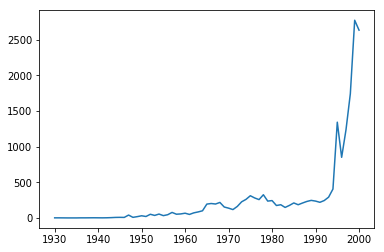

In [309]:
ufo.Year.value_counts().sort_index().plot()

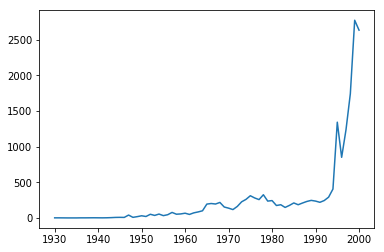

In [312]:
ufo.Year.value_counts().sort_index().plot()